# Data Science 101

[*Andrew Wheeler*, PhD](mailto:andrew.wheeler@hms.com)

This is an example notebook to go along with the Data Science 101 presentation. 

In [1]:
#Loading in the libraries we will be using
import pandas as pd
from sklearn.linear_model import LogisticRegression
import os

#Setting the working directory to where our data is stored
os.chdir(r'C:\Users\e009156\Documents\DataScience_Notes\DataScience_101')

#Reading in the CSV data
brfss_dat = pd.read_csv('Prepped_BRFSS2015.csv')

#A quick view of the first few rows of data
brfss_dat.head()

,Obese_BMI,CurrentSmoker,SEX,MinActWeek,AgeMid
0,1,0,Male,120.0,70
1,0,0,Female,0.0,60
2,0,0,Male,336.0,70
3,0,0,Female,420.0,30
4,0,0,Female,300.0,60


In [2]:
#Browsing the data

brfss_dat.describe()

,Obese_BMI,CurrentSmoker,MinActWeek,AgeMid
count,11156.000000,11156.000000,11156.000000,11156.000000
mean,0.262011,0.134726,133.691466,54.147544
std,0.439749,0.341446,240.147264,15.486705
min,0.000000,0.000000,0.000000,20.000000
25%,0.000000,0.000000,0.000000,40.000000
50%,0.000000,0.000000,56.000000,60.000000
75%,1.000000,0.000000,180.000000,70.000000
max,1.000000,1.000000,3360.000000,70.000000


In [3]:
#Can also look at the counts of individual categories

brfss_dat['SEX'].value_counts()

Female    6280
Male      4876
Name: SEX, dtype: int64

In [4]:
#Sex by Smoking status

smoke_ct = pd.crosstab(brfss_dat['SEX'],brfss_dat['CurrentSmoker'])
smoke_ct.plot.bar()
smoke_ct

CurrentSmoker,0,1
SEX,,
Female,5487,793
Male,4166,710


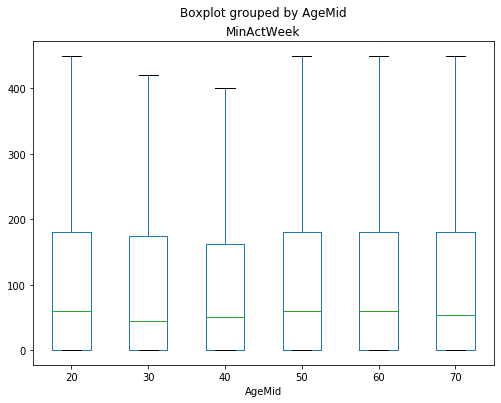

In [5]:
#boxplot of age bins on X axis, and y is activity per week

brfss_dat.boxplot(column = 'MinActWeek', by='AgeMid', grid=False, showfliers=False, figsize=(8,6))

In [6]:
#Estimating a logistic regression equation

#Changing sex to dummy variable, regression does not understand text
brfss_dat['Male'] = 1*(brfss_dat['SEX'] == 'Male')
ind_vars = ['Male','MinActWeek','AgeMid','CurrentSmoker']

logit_model = LogisticRegression(penalty='none', solver='newton-cg')
logit_model.fit(X = brfss_dat[ind_vars], y = brfss_dat['Obese_BMI'])

print( logit_model.intercept_, logit_model.coef_ )


[-1.28684424] [[-0.06533616 -0.00085874  0.00690985  0.05603045]]


In [7]:
#How well do our predictions do
from sklearn.metrics import confusion_matrix

#Getting the predicted probability of obesity per our model
pred_prob = logit_model.predict_proba(X = brfss_dat[ind_vars])[::,1]

#Generating a confusion matrix, setting threshold to predict obese at 30%
con_mat = pd.DataFrame(confusion_matrix(brfss_dat['Obese_BMI'], pred_prob > 0.3),
                       columns=['Predict No','Predict Yes'], index=['Not Obese', 'Obese'])

#The correct guesses are on the diagonal of the confusion matrix
accuracy = (con_mat.iloc[0,0] + con_mat.iloc[1,1] ) / len(brfss_dat)
print("Accuracy")
print("%.2f" % accuracy)

con_mat

Accuracy
0.69


,Predict No,Predict Yes
Not Obese,7272,961
Obese,2503,420


In [8]:
#Apply predictions to newdata

act = range(0,480,60)

new_dat = pd.DataFrame({'Male': 1, 'MinActWeek': act, 'AgeMid': 40, 'CurrentSmoker': 0})
new_dat['PredProbMale'] = logit_model.predict_proba(new_dat)[::,1]
new_dat

,Male,MinActWeek,AgeMid,CurrentSmoker,PredProbMale
0,1,0,40,0,0.254304
1,1,60,40,0,0.244658
2,1,120,40,0,0.235262
3,1,180,40,0,0.226118
4,1,240,40,0,0.217230
5,1,300,40,0,0.208596
6,1,360,40,0,0.200218
7,1,420,40,0,0.192094


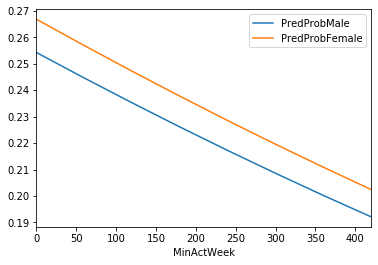

In [9]:
#Line graph comparing males to females
new_dat['Male'] = 0
new_dat['PredProbFemale'] = logit_model.predict_proba(new_dat[ind_vars])[::,1]

new_dat[['MinActWeek','PredProbMale','PredProbFemale']].plot.line(x='MinActWeek')